In [1]:
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

//anaconda/envs/quant/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('../data/sandp.csv', parse_dates=[0], index_col = 0)
df = df.reindex(index=df.index[::-1])

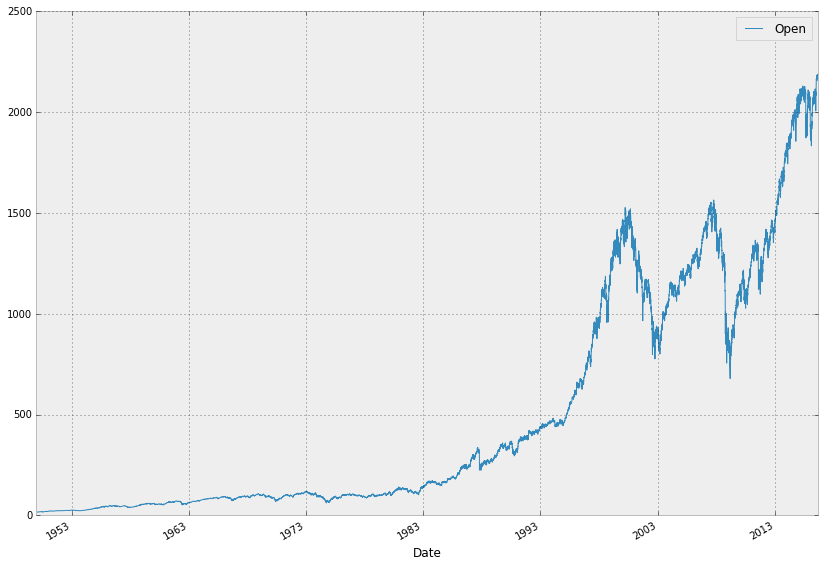

In [3]:
df.plot(y=0, figsize=(14, 10))

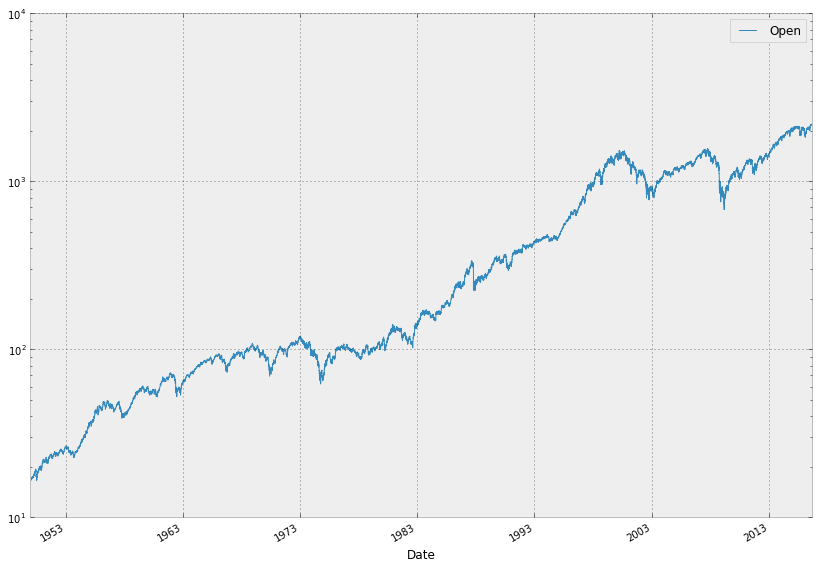

In [4]:
df.plot(y=0, logy=True, figsize=(14, 10))

In [5]:
y = df.Open

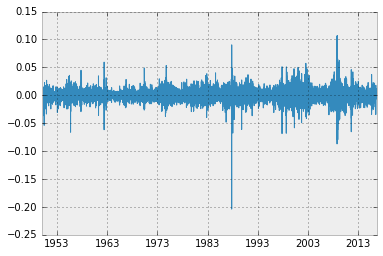

In [6]:
plt.plot(( y.shift(-1) - y ) / y)

In [7]:
def calculate_momentum(y, n):
    return ( y - y.shift(n) ) / y.shift(n)

def plot_momentum(n):
    momentum = calculate_momentum(y, n)
    plt.plot(momentum)

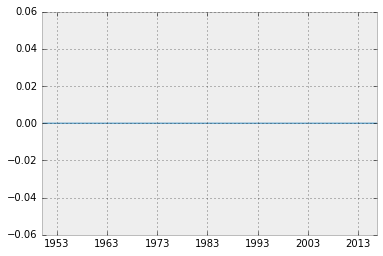

In [8]:
plot_momentum(0)

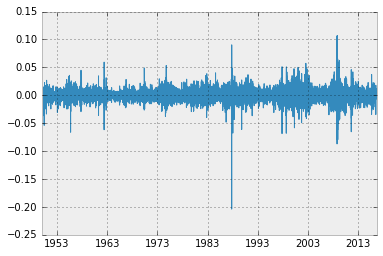

In [9]:
plot_momentum(1)

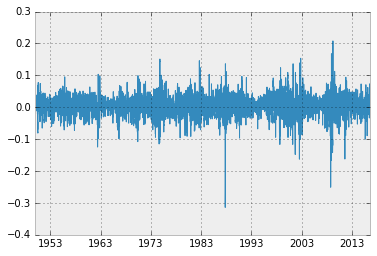

In [10]:
plot_momentum(10)

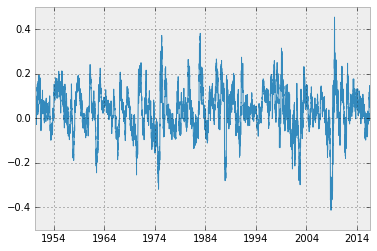

In [11]:
plot_momentum(100)

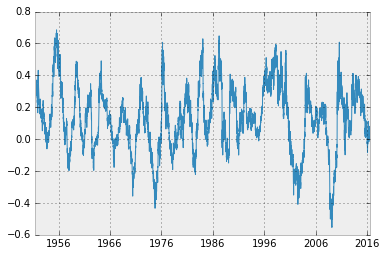

In [12]:
plot_momentum(365)

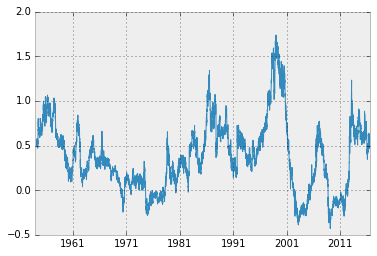

In [13]:
plot_momentum(1000)

In [14]:
# Goal: predict stock will go up or down in N days based on momentum M days back

# TODO N and M different with dropping NA
N = 100
M = 200

best_NM = (0,0)
best_cov = 0

for N in range(1, 250, 5):
    for M in range(1, 250, 5):
        momentum = calculate_momentum(y, M)
        price_difference = y.shift(-N) - y
        pct_return = price_difference / y

        momentum = momentum.dropna()
        pct_return = pct_return.dropna()

        intersect_index = momentum.index.intersection(pct_return.index)
        momentum = momentum[intersect_index]
        pct_return = pct_return[intersect_index]

        # momentum.hist(figsize=(14, 10), bins=400)
        # plt.show()

        # pct_return.hist(figsize=(14, 10), bins=400)
        # plt.show()

        cov = np.cov(momentum, pct_return)[0][1]
        if cov > best_cov:
            best_NM = (N, M)
            best_cov = cov
            print (best_NM, best_cov)

(1, 1) 4.21733100448e-06
(1, 106) 7.31423162645e-06
(1, 111) 9.32283923363e-06
(6, 96) 2.25831296603e-05
(6, 101) 2.92714851206e-05
(6, 106) 4.78754805812e-05
(6, 111) 5.90433949469e-05
(11, 96) 6.75132773172e-05
(11, 101) 8.94048971174e-05
(11, 106) 0.000117121496806
(16, 96) 0.000122535234597
(16, 101) 0.000153529976569
(16, 106) 0.000166141966117
(21, 96) 0.00018175772551
(21, 101) 0.000197631546698
(21, 106) 0.000209223234182
(26, 96) 0.000236435476044
(26, 101) 0.000251277857152
(26, 106) 0.000263047545567
(31, 96) 0.000290732890079
(31, 101) 0.000305776757902
(36, 91) 0.00030938228451
(36, 96) 0.00033730418634
(41, 91) 0.000361581910735
(41, 96) 0.000374071609472
(46, 86) 0.000385964433022
(46, 91) 0.00039654274437
(46, 96) 0.00040266517356
(51, 81) 0.000412985455178
(51, 86) 0.000430454921245
(51, 91) 0.000434942523861
(56, 76) 0.000441350665564
(56, 81) 0.000463930418721
(56, 86) 0.00047527995076
(61, 76) 0.000488503314248
(61, 81) 0.000505250285797
(61, 86) 0.000505804135268
(

In [15]:
best_cov

0.00056269788923650759

In [16]:
best_NM

(81, 86)